# 이번 분석관련, 궁금한점

--> 왜 잡음처리를 표준화한 이후에 하는가?

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
from sklearn.preprocessing import StandardScaler
import datetime
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
! pip install neurokit2 

     |████████████████████████████████| 983kB 2.9MB/s 


In [ ]:
import neurokit2 as nk

>> ## video_id를 조교님이 등록한 엑셀 파일 순서가 아니고 아래 출력된 순서에 따라 1부터 매겼음....


In [ ]:
import os

os.listdir('./gdrive/My Drive/[인텔리전스]과학관프로젝트/Pilot test/EDA/0805Data')

['20200805_1135_Frozen.TXT',
 '20200805_1139.TXT',
 '20200805_1141.TXT',
 '20200805_1143.TXT',
 '20200805_1145.TXT',
 '20200805_1147.TXT',
 '20200805_1149.TXT',
 '20200805_1151.TXT',
 '20200805_1153.TXT',
 '20200805_1155.TXT',
 '20200805_1157.TXT',
 '20200805_1159.TXT',
 '20200805_1201.TXT',
 '20200805_1203.TXT',
 '20200805_1233_도현base.TXT',
 '20200805_1234.TXT',
 '20200805_1236.TXT',
 '20200805_1238.TXT',
 '20200805_1240.TXT',
 '20200805_1242.TXT',
 '20200805_1244.TXT',
 '20200805_1246.TXT',
 '20200805_1247.TXT',
 '20200805_1250.TXT',
 '20200805_1252.TXT',
 '20200805_1254.TXT',
 '20200805_1256.TXT',
 '20200805_1258.TXT',
 '20200805_1300.TXT',
 '20200805_1617_지영base.TXT',
 '20200805_1622.TXT',
 '20200805_1624.TXT',
 '20200805_1626.TXT',
 '20200805_1628.TXT',
 '20200805_1630.TXT',
 '20200805_1632.TXT',
 '20200805_1633.TXT',
 '20200805_1635.TXT',
 '20200805_1637.TXT',
 '20200805_1640.TXT',
 '20200805_1642.TXT',
 '20200805_1644.TXT',
 '20200805_1646.TXT',
 '20200805_1648.TXT',
 '202

#데이터프레임 만들기

>> ## 1.load start-end file

In [ ]:
os.chdir('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/')

dir = os.listdir('./')

user_name = []
time_list = []
for i in range(len(dir)):
  participant_name = input("실험자 변수이름지정:") 
  user_name.append(participant_name)
  time_list.append(participant_name + '_time')

names = []
times = []
for name in user_name:
  globals()[name] = []
  names.append(globals()[name])

for time in time_list:
  globals()[time] = []
  times.append(globals()[time])

i = 0
for files in dir:
  file_list = os.listdir('./{}'.format(files))
  for file in file_list:
    tmp = pd.read_csv('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/_성민/preprossed_start-end/{}/{}'.format(files, file), sep='\t', error_bad_lines=False)
    names[i].append(tmp)
    times[i].append(tmp[tmp.columns[1]])
  
  i += 1


실험자 변수이름지정:UserID_3
실험자 변수이름지정:UserID_7
실험자 변수이름지정:UserID_8


b'Skipping line 5255: expected 2 fields, saw 3\n'


In [ ]:
# check whether files have been imported successfully

print(times[0][0])
print()
print(type(times[0][0]))
print()
print(times[0][0][len(times[0][0])-1])

0        16:23:04.29
1        16:23:04.34
2        16:23:04.29
3        16:23:04.45
4        16:23:04.50
            ...     
5250    16:23:56.518
5251    16:23:56.533
5252    16:23:56.538
5253    16:23:56.565
5254    16:23:56.570
Name: 16:23:04.14, Length: 5255, dtype: object

<class 'pandas.core.series.Series'>

16:23:56.570


In [ ]:
def tmp(a):
  return a.iloc[0]

times[0][0]
tmp(times[0][0])

'16:23:04.29'

In [ ]:
df

,Familiarity,Valence,Arousal,user_ID,Video_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,15515,15516,15517,15518,15519,15520,15521,15522,15523,15524,15525,15526,15527,15528,15529,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554
0,Yes,8,5,3,1,0.403034,1.737922,-0.710246,1.110407,-0.050414,-1.120656,-0.470904,-0.733896,-0.390585,-0.777631,-1.092303,-0.579067,-0.876985,-0.211168,-0.131552,-1.060558,-0.018479,0.469991,0.365258,1.025530,0.299453,0.344571,1.068754,0.019504,-0.249696,-0.092535,-0.669644,-0.532844,-0.773092,-0.974316,-0.496029,-0.474875,0.029633,0.240728,-0.365883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yes,3,5,3,2,-0.600544,1.960717,-0.172260,2.557144,2.370224,1.276169,3.154533,2.506669,1.603338,2.272841,1.687566,1.972590,2.384707,1.339821,1.289880,1.420975,1.073047,1.020025,0.265830,-0.008304,0.429186,0.381729,1.184518,1.998947,2.003054,2.759421,2.793933,2.053893,2.388956,2.065942,1.301366,1.409974,0.799568,0.270213,0.526974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,7,4,3,3,-0.102925,2.025604,0.296456,2.818056,2.684248,1.787281,2.310343,1.424249,1.470875,1.210177,0.072533,0.665063,0.463197,-0.238463,0.156684,-0.191726,-0.152211,-0.036336,-0.827319,-0.388848,0.259401,0.507840,1.373987,1.504013,1.784563,2.564432,2.244275,2.069034,1.674205,0.487360,0.449367,0.276897,-0.635910,-0.382468,0.041794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,7,3,3,4,-0.701042,0.750919,-1.224989,-0.084781,-0.624862,-0.733982,-0.185479,-0.690370,-0.123373,0.503834,0.844708,1.163655,0.961551,1.693675,1.880024,0.902588,0.674476,0.181946,-0.193462,-0.227990,-1.031937,-0.871953,-0.386334,-0.544745,-0.043889,-0.169583,-0.126314,1.050047,0.751404,0.242989,0.905709,1.036556,1.136648,1.019262,0.564651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,3,7,3,5,0.540034,2.428431,-1.486390,0.045192,-0.189257,-1.879227,-0.967455,-1.001485,-0.723542,-0.225794,-1.140860,-0.258341,0.664356,-0.185663,0.143536,0.369105,0.016619,0.972024,1.289582,0.721206,0.746835,0.519631,-0.091175,-0.984246,-1.696334,-1.294507,-1.166372,-1.471302,-0.842352,-0.139508,0.094337,-0.102420,-0.368555,0.499526,1.040533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,5,1,3,6,-0.865930,1.229855,-1.321689,0.916494,1.129629,0.259916,1.140638,0.331904,0.337334,1.210623,0.402820,0.425263,0.506469,-0.232826,-0.080832,-0.703481,-1.246885,-0.291157,-0.484366,-0.898894,-0.194502,-0.094973,0.414565,1.292652,0.725801,0.305746,0.825728,0.798541,0.185095,-0.214532,-0.052585,-0.036710,-0.583318,-0.767883,-0.682951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,7,5,3,7,0.964904,2.182498,-0.566207,1.243665,0.464210,-0.158072,0.552515,-0.191337,0.476173,0.678399,-0.039864,0.680487,1.205210,2.492474,3.312717,1.888930,2.024973,2.469171,1.460570,1.491718,0.942719,0.001506,0.466206,0.352191,0.121405,0.451213,0.514992,0.989373,0.836340,0.239033,0.952513,1.502234,1.231725,1.271013,1.708119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,7,7,3,8,-1.143110,0.801389,-2.275520,-0.158478,-0.040010,-1.265795,-0

>>## 2.Resample

In [ ]:
def original_freq(series):
  max_time_list = series.iloc[-1].split(':')
  second = int(float(max_time_list[2]))
  milliseconds = float(max_time_list[2]) - second
  max_time_list.pop(2)
  max_time_list.extend([second, milliseconds*1000])
  max_time_list = [*map(float, max_time_list)]

  min_time_list = series.iloc[0].split(':')
  second = int(float(min_time_list[2]))
  milliseconds = float(min_time_list[2]) - second
  min_time_list.pop(2)
  min_time_list.extend([second, milliseconds*1000])
  min_time_list = [*map(float, min_time_list)]

  max_time = datetime.timedelta(hours=max_time_list[0], minutes=max_time_list[1], seconds=max_time_list[2], milliseconds=max_time_list[3])
  min_time = datetime.timedelta(hours=min_time_list[0], minutes=min_time_list[1], seconds=min_time_list[2], milliseconds=min_time_list[3])
  video_length = (max_time - min_time).total_seconds()
  return len(series) / video_length


def sample(data, original_freq, target_freq):
    resample = librosa.resample(data, original_freq, target_freq)
    return resample

i = 0
for user in names:
  j = 0
  for video in user:
    video = video.drop(video.columns[1], axis=1)
    video = np.array(video).reshape(video.shape[0])
    names[i][j] = video
    j += 1
  
  i += 1

i = 0
for user in names:
  j = 0
  for video in user:
    original = original_freq(times[i][j])
    names[i][j] = pd.DataFrame(sample(video, original, 128))
    j += 1
  i += 1

>>## 3.Standardization

In [ ]:
# TEST

stand = StandardScaler()

tmp = names[0][0]
tmp

tmp = stand.fit_transform(tmp)

np.std(tmp)

1.0

In [ ]:
len(names)

3

In [ ]:
stand = StandardScaler()

i = 0
for user in names:
  stand_videos = []
  for video in user:
    video = stand.fit_transform(video)
    stand_videos.append(pd.DataFrame(video))
  
  names[i] = stand_videos

  i = i+1

>>## 4.make dataframe

In [ ]:
def clean_data(df):
  tmp = np.array(df).reshape(len(df))
  print()

  signals, info = nk.eda_process(tmp, sampling_rate=128)

  signals

  y = signals[['EDA_Clean']]
  return y

In [ ]:
clean_data(names[0][0])

,EDA_Clean
0,0.390146
1,0.306328
2,0.226454
3,0.151166
4,0.081037
...,...
6687,-7.431077
6688,-7.828567
6689,-8.196731
6690,-8.532129


In [ ]:
timeline_no = list(range(len(names[0][0])))

df = pd.DataFrame(list(names[0][0][0]), index = timeline_no).transpose()
df['user_ID'] = '3'
df['Video_ID'] = 1

cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

user_ID_tmp = input('user_ID: ')
for i in range(1, len(names[0])):
  tmp = list(range(len(names[0][i])))
  df_tmp = pd.DataFrame(list(names[0][i][0]), index = tmp).transpose()
  df_tmp['user_ID'] = user_ID_tmp
  df_tmp['Video_ID'] = i+1

  cols = df_tmp.columns.tolist()
  cols = cols[-2:] + cols[:-2]
  df_tmp = df_tmp[cols]
  
  df = df.append(df_tmp)

for i in range(1, len(names)):
  user_ID_tmp = input('user_ID: ')
  for j in range(len(names[i])):
    tmp = list(range(len(names[i][j])))
    df_tmp = pd.DataFrame(list(names[i][j][0]), index = tmp).transpose()
    df_tmp['user_ID'] = user_ID_tmp
    df_tmp['Video_ID'] = j+1

    cols = df_tmp.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df_tmp = df_tmp[cols]
  
    df = df.append(df_tmp)

    j += 1


df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df

user_ID: 3
user_ID: 7
user_ID: 8


,user_ID,Video_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,15515,15516,15517,15518,15519,15520,15521,15522,15523,15524,15525,15526,15527,15528,15529,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554
0,3,1,0.403034,1.737922,-0.710246,1.110407,-0.050414,-1.120656,-0.470904,-0.733896,-0.390585,-0.777631,-1.092303,-0.579067,-0.876985,-0.211168,-0.131552,-1.060558,-0.018479,0.469991,0.365258,1.025530,0.299453,0.344571,1.068754,0.019504,-0.249696,-0.092535,-0.669644,-0.532844,-0.773092,-0.974316,-0.496029,-0.474875,0.029633,0.240728,-0.365883,0.127028,0.561168,0.357187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2,-0.600544,1.960717,-0.172260,2.557144,2.370224,1.276169,3.154533,2.506669,1.603338,2.272841,1.687566,1.972590,2.384707,1.339821,1.289880,1.420975,1.073047,1.020025,0.265830,-0.008304,0.429186,0.381729,1.184518,1.998947,2.003054,2.759421,2.793933,2.053893,2.388956,2.065942,1.301366,1.409974,0.799568,0.270213,0.526974,0.245387,0.368988,0.598209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,-0.102925,2.025604,0.296456,2.818056,2.684248,1.787281,2.310343,1.424249,1.470875,1.210177,0.072533,0.665063,0.463197,-0.238463,0.156684,-0.191726,-0.152211,-0.036336,-0.827319,-0.388848,0.259401,0.507840,1.373987,1.504013,1.784563,2.564432,2.244275,2.069034,1.674205,0.487360,0.449367,0.276897,-0.635910,-0.382468,0.041794,0.003542,-0.049272,-0.252062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,-0.701042,0.750919,-1.224989,-0.084781,-0.624862,-0.733982,-0.185479,-0.690370,-0.123373,0.503834,0.844708,1.163655,0.961551,1.693675,1.880024,0.902588,0.674476,0.181946,-0.193462,-0.227990,-1.031937,-0.871953,-0.386334,-0.544745,-0.043889,-0.169583,-0.126314,1.050047,0.751404,0.242989,0.905709,1.036556,1.136648,1.019262,0.564651,0.971976,1.049139,0.553673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5,0.540034,2.428431,-1.486390,0.045192,-0.189257,-1.879227,-0.967455,-1.001485,-0.723542,-0.225794,-1.140860,-0.258341,0.664356,-0.185663,0.143536,0.369105,0.016619,0.972024,1.289582,0.721206,0.746835,0.519631,-0.091175,-0.984246,-1.696334,-1.294507,-1.166372,-1.471302,-0.842352,-0.139508,0.094337,-0.102420,-0.368555,0.499526,1.040533,0.352742,0.140532,-0.162542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,6,-0.865930,1.229855,-1.321689,0.916494,1.129629,0.259916,1.140638,0.331904,0.337334,1.210623,0.402820,0.425263,0.506469,-0.232826,-0.080832,-0.703481,-1.246885,-0.291157,-0.484366,-0.898894,-0.194502,-0.094973,0.414565,1.292652,0.725801,0.305746,0.825728,0.798541,0.185095,-0.214532,-0.052585,-0.036710,-0.583318,-0.767883,-0.682951,-0.698496,-0.632073,-0.945697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,7,0.964904,2.182498,-0.566207,1.243665,0.464210,-0.158072,0.552515,-0.191337,0.476173,0.678399,-0.039864,0.680487,1.205210,2.492474,3.312717,1.888930,2.024973,2.469171,1.460570,1.491718,0.942719,0.001506,0.466206,0.352191,0.121405,0.451213,0.514992,0.989373,0.836340,0.239033,0.952513,1.502234,1.231725,1.271013,1.708119,2.311423,2.372844,1.974530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
sam = pd.read_excel('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/Pilot test/sam.xlsx', sheet_name='sam')
sam_info = pd.read_excel('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/Pilot test/sam.xlsx', sheet_name='Participants')

sam_tmp = sam[sam['Name']==sam_info[sam_info['UserID']==3]['Name'].iloc[0]]

UserID_3_familiarity = sam_tmp[sam_tmp['Video']!='Zootopia']['Familiarity']
UserID_3_Valence = sam_tmp[sam_tmp['Video']!='Zootopia']['Valence']
UserID_3_Arousal = sam_tmp[sam_tmp['Video']!='Zootopia']['Arousal']

UserID_7_familiarity = sam[sam['Name']==sam_info[sam_info['UserID']==7]['Name'].iloc[0]]['Familiarity']
UserID_7_Valence = sam[sam['Name']==sam_info[sam_info['UserID']==7]['Name'].iloc[0]]['Valence']
UserID_7_Arousal = sam[sam['Name']==sam_info[sam_info['UserID']==7]['Name'].iloc[0]]['Arousal']

UserID_8_familiarity = sam[sam['Name']==sam_info[sam_info['UserID']==8]['Name'].iloc[0]]['Familiarity']
UserID_8_Valence = sam[sam['Name']==sam_info[sam_info['UserID']==8]['Name'].iloc[0]]['Valence']
UserID_8_Arousal = sam[sam['Name']==sam_info[sam_info['UserID']==8]['Name'].iloc[0]]['Arousal']

familiarity = pd.DataFrame(pd.concat([UserID_3_familiarity, UserID_7_familiarity, UserID_8_familiarity])).reset_index().drop('index', axis=1)
valence = pd.DataFrame(pd.concat([UserID_3_Valence, UserID_7_Valence, UserID_8_Valence])).reset_index().drop('index', axis=1)
arousal = pd.DataFrame(pd.concat([UserID_3_Arousal, UserID_7_Arousal, UserID_8_Arousal])).reset_index().drop('index', axis=1)

df['Familiarity'] = familiarity
df['Valence'] = valence
df['Arousal'] = arousal

cols = df.columns.tolist()
cols = cols[-3:] + cols[:-3]
df = df[cols]

df

,Familiarity,Valence,Arousal,user_ID,Video_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,15515,15516,15517,15518,15519,15520,15521,15522,15523,15524,15525,15526,15527,15528,15529,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554
0,Yes,8,5,3,1,0.403034,1.737922,-0.710246,1.110407,-0.050414,-1.120656,-0.470904,-0.733896,-0.390585,-0.777631,-1.092303,-0.579067,-0.876985,-0.211168,-0.131552,-1.060558,-0.018479,0.469991,0.365258,1.025530,0.299453,0.344571,1.068754,0.019504,-0.249696,-0.092535,-0.669644,-0.532844,-0.773092,-0.974316,-0.496029,-0.474875,0.029633,0.240728,-0.365883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yes,3,5,3,2,-0.600544,1.960717,-0.172260,2.557144,2.370224,1.276169,3.154533,2.506669,1.603338,2.272841,1.687566,1.972590,2.384707,1.339821,1.289880,1.420975,1.073047,1.020025,0.265830,-0.008304,0.429186,0.381729,1.184518,1.998947,2.003054,2.759421,2.793933,2.053893,2.388956,2.065942,1.301366,1.409974,0.799568,0.270213,0.526974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,7,4,3,3,-0.102925,2.025604,0.296456,2.818056,2.684248,1.787281,2.310343,1.424249,1.470875,1.210177,0.072533,0.665063,0.463197,-0.238463,0.156684,-0.191726,-0.152211,-0.036336,-0.827319,-0.388848,0.259401,0.507840,1.373987,1.504013,1.784563,2.564432,2.244275,2.069034,1.674205,0.487360,0.449367,0.276897,-0.635910,-0.382468,0.041794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,7,3,3,4,-0.701042,0.750919,-1.224989,-0.084781,-0.624862,-0.733982,-0.185479,-0.690370,-0.123373,0.503834,0.844708,1.163655,0.961551,1.693675,1.880024,0.902588,0.674476,0.181946,-0.193462,-0.227990,-1.031937,-0.871953,-0.386334,-0.544745,-0.043889,-0.169583,-0.126314,1.050047,0.751404,0.242989,0.905709,1.036556,1.136648,1.019262,0.564651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,3,7,3,5,0.540034,2.428431,-1.486390,0.045192,-0.189257,-1.879227,-0.967455,-1.001485,-0.723542,-0.225794,-1.140860,-0.258341,0.664356,-0.185663,0.143536,0.369105,0.016619,0.972024,1.289582,0.721206,0.746835,0.519631,-0.091175,-0.984246,-1.696334,-1.294507,-1.166372,-1.471302,-0.842352,-0.139508,0.094337,-0.102420,-0.368555,0.499526,1.040533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,5,1,3,6,-0.865930,1.229855,-1.321689,0.916494,1.129629,0.259916,1.140638,0.331904,0.337334,1.210623,0.402820,0.425263,0.506469,-0.232826,-0.080832,-0.703481,-1.246885,-0.291157,-0.484366,-0.898894,-0.194502,-0.094973,0.414565,1.292652,0.725801,0.305746,0.825728,0.798541,0.185095,-0.214532,-0.052585,-0.036710,-0.583318,-0.767883,-0.682951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,7,5,3,7,0.964904,2.182498,-0.566207,1.243665,0.464210,-0.158072,0.552515,-0.191337,0.476173,0.678399,-0.039864,0.680487,1.205210,2.492474,3.312717,1.888930,2.024973,2.469171,1.460570,1.491718,0.942719,0.001506,0.466206,0.352191,0.121405,0.451213,0.514992,0.989373,0.836340,0.239033,0.952513,1.502234,1.231725,1.271013,1.708119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,7,7,3,8,-1.143110,0.801389,-2.275520,-0.158478,-0.040010,-1.265795,-0

In [ ]:
# Clean DataFrame

timeline_no = list(range(len(names[0][0])))

df_clean = pd.DataFrame(list(names[0][0][0]), index = timeline_no).transpose()
df_clean['user_ID'] = '3'
df_clean['Video_ID'] = 1

cols = df_clean.columns.tolist()
cols = cols[-2:] + cols[:-2]
df_clean = df_clean[cols]

user_ID_tmp = input('user_ID: ')
for i in range(1, len(names[0])):
  tmp = list(range(len(names[0][i])))
  df_tmp = clean_data(pd.DataFrame(list(names[0][i][0]), index = tmp)).transpose()
  df_tmp['user_ID'] = user_ID_tmp
  df_tmp['Video_ID'] = i+1

  cols = df_tmp.columns.tolist()
  cols = cols[-2:] + cols[:-2]
  df_tmp = df_tmp[cols]
  
  df_clean = df_clean.append(df_tmp)

for i in range(1, len(names)):
  user_ID_tmp = input('user_ID: ')
  for j in range(len(names[i])):
    tmp = list(range(len(names[i][j])))
    df_tmp = clean_data(pd.DataFrame(list(names[i][j][0]), index = tmp)).transpose()
    df_tmp['user_ID'] = user_ID_tmp
    df_tmp['Video_ID'] = j+1

    cols = df_tmp.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    df_tmp = df_tmp[cols]
  
    df_clean = df_clean.append(df_tmp)

    j += 1


df_clean = df_clean.reset_index()
df_clean.drop('index', axis=1, inplace=True)

sam = pd.read_excel('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/Pilot test/sam.xlsx', sheet_name='sam')
sam_info = pd.read_excel('/content/gdrive/My Drive/[인텔리전스]과학관프로젝트/Pilot test/sam.xlsx', sheet_name='Participants')

sam_tmp = sam[sam['Name']==sam_info[sam_info['UserID']==3]['Name'].iloc[0]]

UserID_3_familiarity = sam_tmp[sam_tmp['Video']!='Zootopia']['Familiarity']
UserID_3_Valence = sam_tmp[sam_tmp['Video']!='Zootopia']['Valence']
UserID_3_Arousal = sam_tmp[sam_tmp['Video']!='Zootopia']['Arousal']

UserID_7_familiarity = sam[sam['Name']==sam_info[sam_info['UserID']==7]['Name'].iloc[0]]['Familiarity']
UserID_7_Valence = sam[sam['Name']==sam_info[sam_info['UserID']==7]['Name'].iloc[0]]['Valence']
UserID_7_Arousal = sam[sam['Name']==sam_info[sam_info['UserID']==7]['Name'].iloc[0]]['Arousal']

UserID_8_familiarity = sam[sam['Name']==sam_info[sam_info['UserID']==8]['Name'].iloc[0]]['Familiarity']
UserID_8_Valence = sam[sam['Name']==sam_info[sam_info['UserID']==8]['Name'].iloc[0]]['Valence']
UserID_8_Arousal = sam[sam['Name']==sam_info[sam_info['UserID']==8]['Name'].iloc[0]]['Arousal']

familiarity = pd.DataFrame(pd.concat([UserID_3_familiarity, UserID_7_familiarity, UserID_8_familiarity])).reset_index().drop('index', axis=1)
valence = pd.DataFrame(pd.concat([UserID_3_Valence, UserID_7_Valence, UserID_8_Valence])).reset_index().drop('index', axis=1)
arousal = pd.DataFrame(pd.concat([UserID_3_Arousal, UserID_7_Arousal, UserID_8_Arousal])).reset_index().drop('index', axis=1)

df_clean['Familiarity'] = familiarity
df_clean['Valence'] = valence
df_clean['Arousal'] = arousal

cols = df_clean.columns.tolist()
cols = cols[-3:] + cols[:-3]
df_clean = df_clean[cols]

df_clean

user_ID: 3














user_ID: 7
















user_ID: 8


















,Familiarity,Valence,Arousal,user_ID,Video_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,15515,15516,15517,15518,15519,15520,15521,15522,15523,15524,15525,15526,15527,15528,15529,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554
0,Yes,8,5,3,1,0.403034,1.737922,-0.710246,1.110407,-0.050414,-1.120656,-0.470904,-0.733896,-0.390585,-0.777631,-1.092303,-0.579067,-0.876985,-0.211168,-0.131552,-1.060558,-0.018479,0.469991,0.365258,1.025530,0.299453,0.344571,1.068754,0.019504,-0.249696,-0.092535,-0.669644,-0.532844,-0.773092,-0.974316,-0.496029,-0.474875,0.029633,0.240728,-0.365883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yes,3,5,3,2,-0.616492,-0.394296,-0.174709,0.040037,0.247817,0.446652,0.634750,0.810542,0.972701,1.120168,1.252154,1.368147,1.467903,1.551439,1.619013,1.671104,1.708390,1.731715,1.742072,1.740567,1.728397,1.706824,1.677156,1.640724,1.598864,1.552902,1.504137,1.453829,1.403181,1.353331,1.305331,1.260137,1.218596,1.181437,1.149255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,7,4,3,3,-0.179833,-0.104317,-0.027214,0.050391,0.127457,0.203019,0.276205,0.346259,0.412549,0.474576,0.531971,0.584492,0.632011,0.674510,0.712059,0.744803,0.772950,0.796752,0.816496,0.832490,0.845056,0.854520,0.861211,0.865454,0.867571,0.867874,0.866668,0.864240,0.860863,0.856783,0.852218,0.847350,0.842320,0.837224,0.832110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,7,3,3,4,-0.695254,-0.583973,-0.475945,-0.371944,-0.272687,-0.178823,-0.090927,-0.009484,0.065108,0.132552,0.192654,0.245325,0.290579,0.328535,0.359411,0.383513,0.401225,0.412999,0.419339,0.420783,0.417895,0.411243,0.401392,0.388890,0.374266,0.358016,0.340608,0.322476,0.304023,0.285624,0.267623,0.250340,0.234070,0.219085,0.205633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,3,7,3,5,0.611228,0.542983,0.473951,0.404960,0.336800,0.270206,0.205837,0.144268,0.085979,0.031351,-0.019335,-0.065892,-0.108222,-0.146308,-0.180196,-0.209991,-0.235838,-0.257912,-0.276406,-0.291526,-0.303476,-0.312462,-0.318682,-0.322330,-0.323596,-0.322667,-0.319729,-0.314969,-0.308576,-0.300740,-0.291653,-0.281503,-0.270478,-0.258759,-0.246523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,5,1,3,6,-0.907409,-0.810431,-0.712685,-0.615447,-0.519953,-0.427374,-0.338790,-0.255169,-0.177349,-0.106029,-0.041762,0.015050,0.064151,0.105428,0.138900,0.164707,0.183100,0.194426,0.199114,0.197663,0.190628,0.178612,0.162253,0.142213,0.119173,0.093818,0.066832,0.038886,0.010628,-0.017329,-0.044411,-0.070103,-0.093946,-0.115557,-0.134625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,7,5,3,7,1.029870,1.046747,1.060895,1.072513,1.081807,1.088987,1.094254,1.097801,1.099806,1.100430,1.099823,1.098123,1.095462,1.091972,1.087791,1.083066,1.077957,1.072640,1.067301,1.062141,1.057361,1.053165,1.049745,1.047278,1.045919,1.045795,1.046997,1.049584,1.053576,1.058959,1.065683,1.073671,1.082818,1.092999,1.104071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,7,7,3,8,-1.183133,-1.064578,-0.946772,-0.830962,-0.718340,-0.610019,-0.507012,-0.41

# 데이터 분석하기
1. 같은 video 끼리 3명의 데이터 분포를 비교해본다
2. 각 실험자마다 arousal과 valence 각각을 특정 기준으로 나누어서 그래프를 겹쳐서 보인다. 
   그 다음, 각각의 겹친 그래프가 비슷한 양상을 보이는지 비교
3. 2번과 비슷하게, 각 실험자마다 arousal과 valence 각각을 5로 기준으로 나누어   hue로 설정하고, 그래프를 겹쳐서 보인다. 
4. Familiarity (Y / N)에 따라 valence, arousal, gsr데이터에 유의미한 차이가 있는지 살펴보기 

In [ ]:
User3 = df[df['user_ID'] == '3']
User7 = df[df['user_ID'] == '7']
User8 = df[df['user_ID'] == '8']

User3_clean = df_clean[df_clean['user_ID'] == '3']
User7_clean = df_clean[df_clean['user_ID'] == '7']
User8_clean = df_clean[df_clean['user_ID'] == '8']

In [ ]:
User3

,Familiarity,Valence,Arousal,user_ID,Video_ID,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,15515,15516,15517,15518,15519,15520,15521,15522,15523,15524,15525,15526,15527,15528,15529,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15545,15546,15547,15548,15549,15550,15551,15552,15553,15554
0,Yes,8,5,3,1,0.403034,1.737922,-0.710246,1.110407,-0.050414,-1.120656,-0.470904,-0.733896,-0.390585,-0.777631,-1.092303,-0.579067,-0.876985,-0.211168,-0.131552,-1.060558,-0.018479,0.469991,0.365258,1.025530,0.299453,0.344571,1.068754,0.019504,-0.249696,-0.092535,-0.669644,-0.532844,-0.773092,-0.974316,-0.496029,-0.474875,0.029633,0.240728,-0.365883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yes,3,5,3,2,-0.600544,1.960717,-0.172260,2.557144,2.370224,1.276169,3.154533,2.506669,1.603338,2.272841,1.687566,1.972590,2.384707,1.339821,1.289880,1.420975,1.073047,1.020025,0.265830,-0.008304,0.429186,0.381729,1.184518,1.998947,2.003054,2.759421,2.793933,2.053893,2.388956,2.065942,1.301366,1.409974,0.799568,0.270213,0.526974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,7,4,3,3,-0.102925,2.025604,0.296456,2.818056,2.684248,1.787281,2.310343,1.424249,1.470875,1.210177,0.072533,0.665063,0.463197,-0.238463,0.156684,-0.191726,-0.152211,-0.036336,-0.827319,-0.388848,0.259401,0.507840,1.373987,1.504013,1.784563,2.564432,2.244275,2.069034,1.674205,0.487360,0.449367,0.276897,-0.635910,-0.382468,0.041794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,7,3,3,4,-0.701042,0.750919,-1.224989,-0.084781,-0.624862,-0.733982,-0.185479,-0.690370,-0.123373,0.503834,0.844708,1.163655,0.961551,1.693675,1.880024,0.902588,0.674476,0.181946,-0.193462,-0.227990,-1.031937,-0.871953,-0.386334,-0.544745,-0.043889,-0.169583,-0.126314,1.050047,0.751404,0.242989,0.905709,1.036556,1.136648,1.019262,0.564651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yes,3,7,3,5,0.540034,2.428431,-1.486390,0.045192,-0.189257,-1.879227,-0.967455,-1.001485,-0.723542,-0.225794,-1.140860,-0.258341,0.664356,-0.185663,0.143536,0.369105,0.016619,0.972024,1.289582,0.721206,0.746835,0.519631,-0.091175,-0.984246,-1.696334,-1.294507,-1.166372,-1.471302,-0.842352,-0.139508,0.094337,-0.102420,-0.368555,0.499526,1.040533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,5,1,3,6,-0.865930,1.229855,-1.321689,0.916494,1.129629,0.259916,1.140638,0.331904,0.337334,1.210623,0.402820,0.425263,0.506469,-0.232826,-0.080832,-0.703481,-1.246885,-0.291157,-0.484366,-0.898894,-0.194502,-0.094973,0.414565,1.292652,0.725801,0.305746,0.825728,0.798541,0.185095,-0.214532,-0.052585,-0.036710,-0.583318,-0.767883,-0.682951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,No,7,5,3,7,0.964904,2.182498,-0.566207,1.243665,0.464210,-0.158072,0.552515,-0.191337,0.476173,0.678399,-0.039864,0.680487,1.205210,2.492474,3.312717,1.888930,2.024973,2.469171,1.460570,1.491718,0.942719,0.001506,0.466206,0.352191,0.121405,0.451213,0.514992,0.989373,0.836340,0.239033,0.952513,1.502234,1.231725,1.271013,1.708119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,No,7,7,3,8,-1.143110,0.801389,-2.275520,-0.158478,-0.040010,-1.265795,-0

>>## 분석1

In [ ]:
# Frozen

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[0]
y2 = User7.iloc[:, 5:].iloc[0]
y3 = User8.iloc[:, 5:].iloc[0]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Frozen_Clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[0]
y2 = User7_clean.iloc[:, 5:].iloc[0]
y3 = User8_clean.iloc[:, 5:].iloc[0]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Up

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[1]
y2 = User7.iloc[:, 5:].iloc[1]
y3 = User8.iloc[:, 5:].iloc[1]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Up_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[1]
y2 = User7_clean.iloc[:, 5:].iloc[1]
y3 = User8_clean.iloc[:, 5:].iloc[1]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Aladdin

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[2]
y2 = User7.iloc[:, 5:].iloc[2]
y3 = User8.iloc[:, 5:].iloc[2]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Aladdin_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[2]
y2 = User7_clean.iloc[:, 5:].iloc[2]
y3 = User8_clean.iloc[:, 5:].iloc[2]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Bighero

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[3]
y2 = User7.iloc[:, 5:].iloc[3]
y3 = User8.iloc[:, 5:].iloc[3]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Bighero_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[3]
y2 = User7_clean.iloc[:, 5:].iloc[3]
y3 = User8_clean.iloc[:, 5:].iloc[3]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Coco

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[4]
y2 = User7.iloc[:, 5:].iloc[4]
y3 = User8.iloc[:, 5:].iloc[4]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Coco_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[4]
y2 = User7_clean.iloc[:, 5:].iloc[4]
y3 = User8_clean.iloc[:, 5:].iloc[4]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Earth

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[5]
y2 = User7.iloc[:, 5:].iloc[5]
y3 = User8.iloc[:, 5:].iloc[5]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Earth_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[5]
y2 = User7_clean.iloc[:, 5:].iloc[5]
y3 = User8_clean.iloc[:, 5:].iloc[5]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Elbin Superband

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[6]
y2 = User7.iloc[:, 5:].iloc[6]
y3 = User8.iloc[:, 5:].iloc[6]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Elbin Superband_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[6]
y2 = User7_clean.iloc[:, 5:].iloc[6]
y3 = User8_clean.iloc[:, 5:].iloc[6]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Good Dino

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[7]
y2 = User7.iloc[:, 5:].iloc[7]
y3 = User8.iloc[:, 5:].iloc[7]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Good Dino_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[7]
y2 = User7_clean.iloc[:, 5:].iloc[7]
y3 = User8_clean.iloc[:, 5:].iloc[7]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Harrypotter

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[8]
y2 = User7.iloc[:, 5:].iloc[8]
y3 = User8.iloc[:, 5:].iloc[8]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Harrypotter_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[8]
y2 = User7_clean.iloc[:, 5:].iloc[8]
y3 = User8_clean.iloc[:, 5:].iloc[8]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Insideout

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[9]
y2 = User7.iloc[:, 5:].iloc[9]
y3 = User8.iloc[:, 5:].iloc[9]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Insideout_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[9]
y2 = User7_clean.iloc[:, 5:].iloc[9]
y3 = User8_clean.iloc[:, 5:].iloc[9]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Lionking

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[10]
y2 = User7.iloc[:, 5:].iloc[10]
y3 = User8.iloc[:, 5:].iloc[10]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Lionking_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[10]
y2 = User7_clean.iloc[:, 5:].iloc[10]
y3 = User8_clean.iloc[:, 5:].iloc[10]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Little Prince

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[11]
y2 = User7.iloc[:, 5:].iloc[11]
y3 = User8.iloc[:, 5:].iloc[11]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Little Prince_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[11]
y2 = User7_clean.iloc[:, 5:].iloc[11]
y3 = User8_clean.iloc[:, 5:].iloc[11]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Minians

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[12]
y2 = User7.iloc[:, 5:].iloc[12]
y3 = User8.iloc[:, 5:].iloc[12]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Minians_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[12]
y2 = User7_clean.iloc[:, 5:].iloc[12]
y3 = User8_clean.iloc[:, 5:].iloc[12]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Moana

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[13]
y2 = User7.iloc[:, 5:].iloc[13]
y3 = User8.iloc[:, 5:].iloc[13]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Moana_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[13]
y2 = User7_clean.iloc[:, 5:].iloc[13]
y3 = User8_clean.iloc[:, 5:].iloc[13]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Pono

plt.figure(figsize=(100,40))

y1 = User3.iloc[:, 5:].iloc[14]
y2 = User7.iloc[:, 5:].iloc[14]
y3 = User8.iloc[:, 5:].iloc[14]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Pono_clean

plt.figure(figsize=(100,40))

y1 = User3_clean.iloc[:, 5:].iloc[14]
y2 = User7_clean.iloc[:, 5:].iloc[14]
y3 = User8_clean.iloc[:, 5:].iloc[14]

plt.subplot(411)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1)

plt.subplot(412)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(413)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(414)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Zootopia

plt.figure(figsize=(100,40))

# y1 = User3.iloc[:, 5:].iloc[15]
y2 = User7.iloc[:, 5:].iloc[15]
y3 = User8.iloc[:, 5:].iloc[15]

# plt.subplot(411)
# plt.ylim(-3,3)
# plt.xticks(range(0,16000,128))
# plt.plot(y1)

plt.subplot(311)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(312)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(313)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
# plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

In [ ]:
# Zootopia_clean

plt.figure(figsize=(100,40))

# y1 = User3.iloc[:, 5:].iloc[15]
y2 = User7_clean.iloc[:, 5:].iloc[15]
y3 = User8_clean.iloc[:, 5:].iloc[15]

# plt.subplot(411)
# plt.ylim(-3,3)
# plt.xticks(range(0,16000,128))
# plt.plot(y1)

plt.subplot(311)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y2)

plt.subplot(312)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
plt.plot(y3)

# 겹쳐서 보이기

plt.subplot(313)
plt.ylim(-3,3)
plt.xticks(range(0,16000,128))
# plt.plot(y1, color = 'r', label = 'user_3')
plt.plot(y2, color = 'b', label = 'user_7')
plt.plot(y3, color = 'g', label = 'user_8')
plt.legend()

plt.show()

>>## 분석2

In [ ]:
tmp = User3_clean[User3_clean['Arousal']<=3]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User3_clean[User3_clean['Arousal']>=7]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User7_clean[User7_clean['Arousal']<=3]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User7_clean[User7_clean['Arousal']>=7]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User8_clean[User8_clean['Arousal']<=3]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User8_clean[User8_clean['Arousal']>=7]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User3_clean[User3_clean['Valence']<=3]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User3_clean[User3_clean['Valence']>=7]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User7_clean[User7_clean['Valence']<=3]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User7_clean[User7_clean['Valence']>=7]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User8_clean[User8_clean['Valence']<=3]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

In [ ]:
tmp = User8_clean[User8_clean['Valence']>=7]

plt.figure(figsize=(100,40))

Y = []
for i in range(tmp.shape[0]):
  Y.append(pd.DataFrame(list(tmp.iloc[:, 5:].iloc[i])))

for i in range(len(Y)):
  plt.subplot(len(Y)+1, 1, i+1)
  plt.xticks(range(0,16000,128))
  plt.plot(Y[i])

plt.subplot(len(Y)+1,1,len(Y)+1)
plt.xticks(range(0,16000,128))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'springgreen', 'dodgerblue', 'violet', 'orange', 'pink', 'tomato', 'purple', 'slateblue']

for i in range(tmp.shape[0]):
  plt.plot(Y[i], color = colors[i])
  
plt.show()

>>## 분석3

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df_clean[df_clean['user_ID'] == '3']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Arousal']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Arousal']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df[df['user_ID'] == '3']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Arousal']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Arousal']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df_clean[df_clean['user_ID'] == '7']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Arousal']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Arousal']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df[df['user_ID'] == '7']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Arousal']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Arousal']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df_clean[df_clean['user_ID'] == '8']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Arousal']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Arousal']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df[df['user_ID'] == '8']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Arousal']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Arousal']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df_clean[df_clean['user_ID'] == '3']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Valence']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Valence']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df[df['user_ID'] == '3']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Valence']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Valence']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df_clean[df_clean['user_ID'] == '7']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Valence']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Valence']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df[df['user_ID'] == '7']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Valence']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Valence']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df_clean[df_clean['user_ID'] == '8']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Valence']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Valence']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(100,40))
plt.xticks(range(0,16000,128))

tmp = df[df['user_ID'] == '8']

R = []
B = []
for i in range(tmp.shape[0]):
  if(tmp.iloc[i, :]['Valence']<=3):
    R.append(tmp.iloc[:, 5:].iloc[i])
  elif(tmp.iloc[i, :]['Valence']>=7):
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

>>## 분석4

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
sns.countplot(User3['Valence'], hue = User3['Familiarity'])

plt.subplot(2,1,2)
sns.countplot(User3['Arousal'], hue = User3['Familiarity'])

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
sns.countplot(User3['Valence'], hue = User3['Familiarity'])

plt.subplot(3,1,2)
sns.countplot(User3['Arousal'], hue = User3['Familiarity'])

plt.figure(figsize=(100,40))
plt.subplot(3,1,3)
tmp = df[df['user_ID'] == '3']

R = []
B = []
for i in range(tmp.shape[0]):
  if (tmp['Familiarity'][i]=='Yes'):
    R.append(tmp.iloc[:, 5:].iloc[i])
  else:
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')

plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
sns.countplot(User7['Valence'], hue = User7['Familiarity'])

plt.subplot(3,1,2)
sns.countplot(User7['Arousal'], hue = User7['Familiarity'])

'''
plt.figure(figsize=(100,40))
plt.subplot(3,1,3)
tmp = df[df['user_ID'] == '7']

R = []
B = []
for i in range(tmp.shape[0]):
  if (tmp['Familiarity'][i]=='Yes'):
    R.append(tmp.iloc[:, 5:].iloc[i])
  else:
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')
'''

plt.show()

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(3,1,1)
sns.countplot(User8['Valence'], hue = User8['Familiarity'])

plt.subplot(3,1,2)
sns.countplot(User8['Arousal'], hue = User8['Familiarity'])

'''
plt.figure(figsize=(100,40))
plt.subplot(3,1,3)
tmp = df[df['user_ID'] == '8']
R = []
B = []
for i in range(tmp.shape[0]):
  if (tmp['Familiarity'][i]=='Yes'):
    R.append(tmp.iloc[:, 5:].iloc[i])
  else:
    B.append(tmp.iloc[:, 5:].iloc[i])

for i in range(len(R)):
  plt.ylim(-5,5)
  plt.plot(R[i], color='r')

for i in range(len(B)):
  plt.ylim(-5,5)
  plt.plot(B[i], color='b')
'''

plt.show()

# 데이터 잡음 제거하기

In [ ]:
df = names[int(input('names[i][j]의 i 입력:'))][int(input('names[i][j]의 j 입력:'))]
tmp = np.array(df).reshape(len(df))
print()

signals, info = nk.eda_process(tmp, sampling_rate=128)

signals

y1 = signals['EDA_Raw']
y2 = signals['EDA_Clean']
y3 = signals['EDA_Tonic']
y4 = signals['EDA_Phasic']

plt.figure(figsize = (100,50))

plt.subplot(5,1,1)
plt.plot(y1, label='Raw', color = 'r')

plt.subplot(5,1,2)
plt.plot(y2, label='Clean', color = 'g')

plt.subplot(5,1,3)
plt.plot(y3, label='Tonic', color = 'b')

plt.subplot(5,1,4)
plt.plot(y4, label='Phasic', color = 'm')

plt.subplot(5,1,5)
plt.plot(y1, label='Raw', color = 'r')
plt.plot(y2, label='Clean', color = 'g')
plt.plot(y3, label='Tonic', color = 'b')
plt.plot(y4, label='Phasic', color = 'm')

plt.legend()
plt.show()

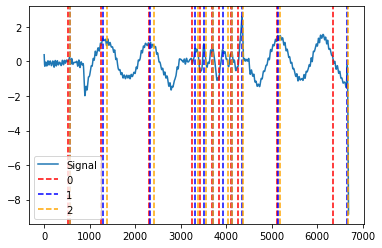

In [ ]:
cleaned = signals["EDA_Clean"]
features = [info["SCR_Onsets"], info["SCR_Peaks"], info["SCR_Recovery"]]

# Visualize SCR features in cleaned EDA signal
plot = nk.events_plot(features, cleaned, color=['red', 'blue', 'orange'])

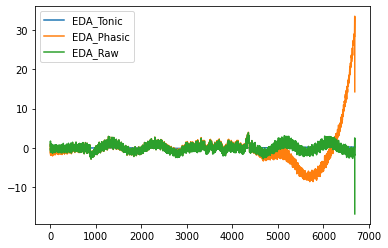

In [ ]:
# Filter phasic and tonic components
data = nk.eda_phasic(tmp, sampling_rate=128)

data["EDA_Raw"] = tmp  # Add raw signal
data.plot()

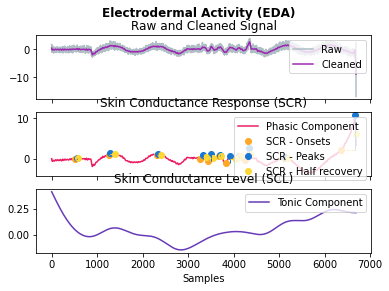

In [ ]:
plot = nk.eda_plot(signals)

## 다음주 과제: 논문 읽고, 논문 용어 검색 및 조사해오기
  && 논문에서 어떤 feature을 어떻게 사용했는지 읽어보기
  ## 논문의 내용을 읽어보기보다 용어에 익숙해오기